In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [129]:
np.random.seed(42)

In [130]:
df = pd.DataFrame({
    'LSAT': [576, 635,558,578,666,580,555,661,
             651,605,653,575,545,572,594],
    'GPA': [3.39,3.30,2.81,3.03,3.44,3.07,3.00,3.43,
            3.36,3.13,3.12,2.74,2.76,2.88,3.96]
})

In [131]:
x = np.array(df['LSAT'])

In [132]:
y = np.array(df['GPA'])

First we calculate the plug-in estimator for the correlation coefficient. This is the correlation coefficient between the vectors x and y, calculated below as theta_hat.

In [133]:
theta_hat = np.mean((x - np.mean(x)) * (y - np.mean(y))) / (np.std(x) * np.std(y))

In [134]:
print('Plug-in estimate of correlation coefficient: {:.4f}'.format(corr))

Plug-in estimate of correlation coefficient: 0.5459


Now we estimate the standard error by bootstrapping. We calculate a vector T_boot below and then compute its variance. We calculate T_boot it in two steps. First we find X_stars, which consists of B bootstrap samples. Then we compute the correlation coefficients of each boostrap sample in X_stars.

In [135]:
n = len(x)

In [136]:
xy = np.array(df)

In [137]:
B = int(1e5)

In [138]:
X_stars = [xy[np.random.randint(low=0, high=n, size=n),:] for _ in range(B)]

In [139]:
X_stars[:3]

[array([[555.  ,   3.  ],
        [578.  ,   3.03],
        [545.  ,   2.76],
        [594.  ,   3.96],
        [653.  ,   3.12],
        [661.  ,   3.43],
        [545.  ,   2.76],
        [666.  ,   3.44],
        [555.  ,   3.  ],
        [605.  ,   3.13],
        [558.  ,   2.81],
        [555.  ,   3.  ],
        [653.  ,   3.12],
        [653.  ,   3.12],
        [661.  ,   3.43]]),
 array([[666.  ,   3.44],
        [578.  ,   3.03],
        [661.  ,   3.43],
        [661.  ,   3.43],
        [558.  ,   2.81],
        [580.  ,   3.07],
        [666.  ,   3.44],
        [635.  ,   3.3 ],
        [661.  ,   3.43],
        [575.  ,   2.74],
        [572.  ,   2.88],
        [580.  ,   3.07],
        [635.  ,   3.3 ],
        [575.  ,   2.74],
        [666.  ,   3.44]]),
 array([[576.  ,   3.39],
        [575.  ,   2.74],
        [605.  ,   3.13],
        [580.  ,   3.07],
        [545.  ,   2.76],
        [575.  ,   2.74],
        [651.  ,   3.36],
        [576.  ,   3.39],
        

In [140]:
T_boot = np.array([
    np.corrcoef(z[:, 0], z[:,1])[1,0] for z in X_stars
])

In [141]:
T_boot[:3]

array([0.56350054, 0.95022758, 0.27113916])

Text(0.5, 1.0, 'Calculated correlation coefficients for 10000 bootstrap samples')

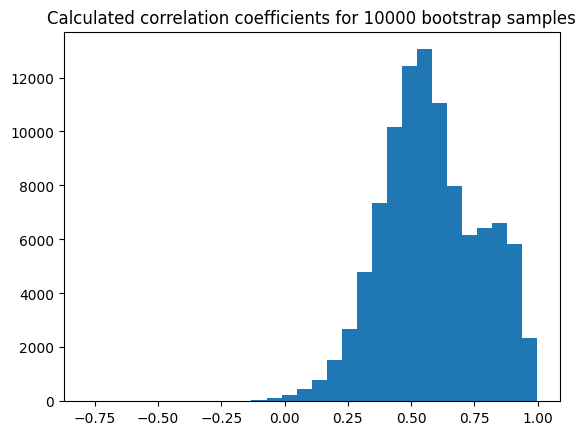

In [142]:
plt.hist(T_boot, bins=30)
plt.title('Calculated correlation coefficients for 10000 bootstrap samples')

In [143]:
v_boot = np.var(T_boot)

In [144]:
se_boot = np.sqrt(v_boot)

In [145]:
print('Bootstrap estimated standard error: {:.4f}'.format(se_boot))

Bootstrap estimated standard error: 0.1965


Finally we calculate confidence intervals using the methods outlined in the chapter.

In [146]:
alpha = 0.05

In [147]:
z = norm.ppf(1-alpha/2)

In [148]:
theta_star_up = np.quantile(T_boot, 1-alpha/2)

In [149]:
theta_star_low = np.quantile(T_boot, alpha/2)

In [150]:
print('Normal interval: ({0:.5f}, {1:.5f})'.format(theta_hat-z*se_boot, theta_hat+z*se_boot))
print('Pivotal interval: ({0:.5f}, {1:.5f})'.format(2*theta_hat-theta_star_up, 2*theta_hat-theta_star_low))
print('Percentile inverval: ({0:.5f}, {1:.5f})'.format(theta_star_low, theta_star_up))

Normal interval: (0.16087, 0.93097)
Pivotal interval: (0.15521, 0.88797)
Percentile inverval: (0.20387, 0.93663)
